In [1]:
## WordCloud

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import os
import glob
import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
os.chdir("../eth")


extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "combined_eth_data.csv", index=False, encoding='utf-8-sig')     
df = pd.read_csv("combined_eth_data.csv")



In [15]:
df.tail()

,id,conversation_id,created_at,date,time,tweet,hashtags
190687,1447094552410660864,1447094552410660864,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,"current price of #Ethereum : 3,596.20 USDT la...",['ethereum']
190688,1447094551294976005,1447094551294976005,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,Yo these @CryptoHeadsNFT looking fine as hell ...,"['nft', 'nfts', 'nftcommunity', 'nftcollector'..."
190689,1447094550342750212,1447094550342750212,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,𝐏𝐈𝐋𝐃𝐎𝐑𝐀 💊 🤔¿Sabías que el TUT ha pasado por 3...,[]
190690,1447094553190846464,1447094553190846464,2021-10-10 00:00:01 Pacific Daylight Time,2021-10-10,00:00:01,"#HourlyCryptoStatus #1 #btc $55,663 1.4% 24h ...","['hourlycryptostatus', 'btc', 'eth', 'ada']"
190691,1447094547234926594,1447094547234926594,2021-10-10 00:00:00 Pacific Daylight Time,2021-10-10,00:00:00,#Cryptocurrencies Current Prices: #Bitcoin $ ...,"['cryptocurrencies', 'bitcoin', 'ethereum', 'c..."


In [16]:
print("There are {} observations and {} features in this data set.\n".format(df.shape[0],df.shape[1]))

There are 190692 observations and 7 features in this data set.



In [20]:
?WordCloud

In [17]:
text = df.hashtags
readtext = str(text)


In [18]:
wordcloud = WordCloud().generate(readtext)

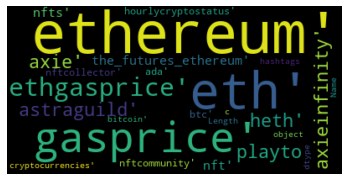

In [19]:
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

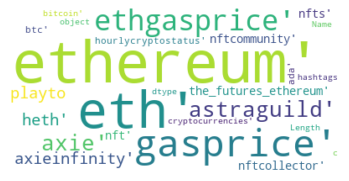

In [20]:
#lower max_font_size, change the max number of words and lighten the background

wordcloud = WordCloud(background_color = "white").generate(readtext)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["name", "length", "dtype", "object", "hashtags", "axs", "airdrops", "airdrop", "giveawayinspector"])

<function matplotlib.pyplot.show(close=None, block=None)>

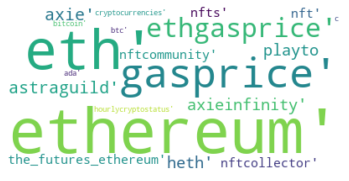

In [22]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size= 100, max_words= 50, background_color="white").generate(readtext)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show

In [23]:
eth_image= np.array(Image.open("eth.png"))
eth_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

In [25]:
transformed_eth_image = np.ndarray((eth_image.shape[0], eth_image.shape[1]), np.int32)
for i in range (len(eth_image)):
    transformed_eth_image[i] = list(map(transform_format, eth_image[i]))

In [26]:
transformed_eth_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

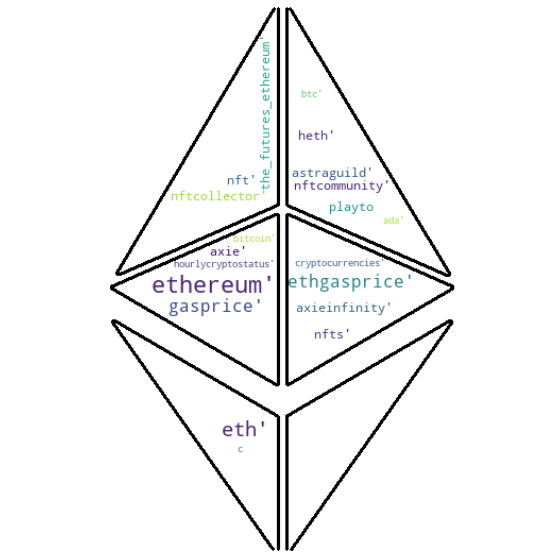

In [27]:
wc=WordCloud(background_color= "white", mask= transformed_eth_image, stopwords=stopwords, contour_width = 3, contour_color ='black')
wc.generate(readtext)
wc.to_file("eth.png")
plt.figure(figsize= [10,10])
plt.imshow(wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [14]:
retval = os.getcwd()
print(retval)

C:\Users\liuma\Project_1\Data\eth
